## Import Libraries & Data Overview

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn

In [ ]:
df = pd.read_excel("boston.xlsx")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0



## Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Correlation Matrix

Prevent collinearity by removing linearly dependent variables.

For example, if 2 variables A and B have a correlation coefficient larger than 0.9, eliminate one to avoid redundency.

<Axes: >

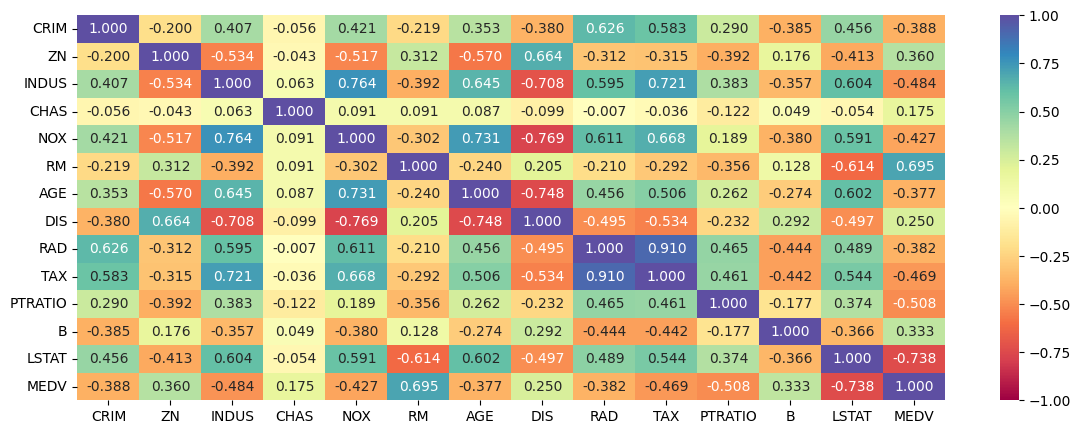

In [ ]:
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".3f",cmap="Spectral")


In [ ]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

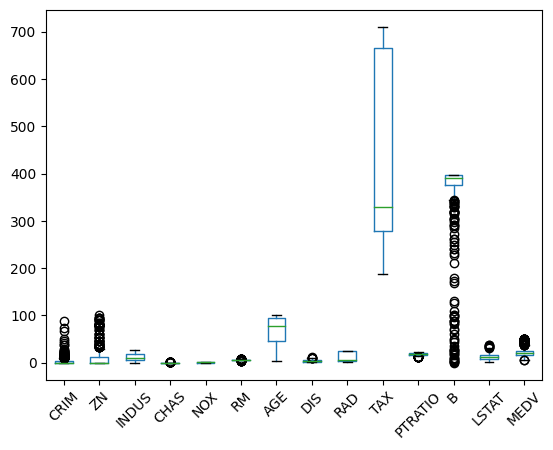

In [ ]:
import matplotlib.pyplot as plt
df.boxplot(grid=False, rot=45)
plt.show()

*
*TAX and RAD are 2 variables which have correlation coefficient larger than 0.9. So we are eliminating the RAD to avoid redundancy

In [ ]:
df.drop(columns="RAD",inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0


In [ ]:
df.rename(columns = {'MEDV':'target'},inplace=True)

## Data Preparation

### Data Partition

Partition the data into 75% training and 25% validation set.


*   MEDV is our target variable and the remaining are the feature
variables
*   With respect to MEDV, LSTAT has a high negative correlation


In [ ]:
X = df
y = df['target']

In [ ]:
X.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,18.7,396.90,5.33,36.2


In [ ]:
list(df.columns[0:12])

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X[list(df.columns[0:12])],y,test_size=0.25,shuffle=True,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 12)
(127, 12)
(379,)
(127,)


We split the model into 25% training....we stored all the features in x and the target variable in y (i.e, MEDV)  


## Model Building

### Linear Regression Model

If we fit a linear regression model on the training set, what will be the feature weights?

In [ ]:
from sklearn import linear_model
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)
Coefficients_feature_weights = linear_reg.coef_
list(Coefficients_feature_weights)

[-0.09208294681311019,
 0.022359443130075856,
 -0.005077194640570531,
 3.1173170063193036,
 -14.519439010448254,
 4.630679157683229,
 -0.012253825470207877,
 -1.379914536677741,
 0.0013042009799832596,
 -0.8228044857928096,
 0.01240956474960012,
 -0.5088941924999735]

### Linear Regression with Two Predictors

Now only consider two input variables: Age and RM.

Fit a linear regression model on the training set with a package at your choice.

Present the model summary. We call this model **Model 1**.

In [ ]:
# Split Age, RM columns into training and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[['AGE','RM']],y,test_size=0.25)

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [ ]:
X_train

array([[ 85.4  ,   6.405],
       [ 98.2  ,   6.335],
       [ 97.9  ,   5.617],
       [ 17.5  ,   5.961],
       [ 61.1  ,   7.185],
       [ 92.7  ,   5.454],
       [ 92.9  ,   5.961],
       [ 24.8  ,   7.923],
       [  6.6  ,   6.417],
       [ 53.8  ,   5.807],
       [ 74.4  ,   6.86 ],
       [ 18.5  ,   5.884],
       [ 29.2  ,   6.145],
       [ 53.7  ,   6.232],
       [ 16.3  ,   6.24 ],
       [ 31.1  ,   5.787],
       [ 79.2  ,   6.226],
       [ 93.3  ,   6.461],
       [ 36.6  ,   5.456],
       [ 90.7  ,   6.229],
       [ 27.6  ,   6.826],
       [ 45.   ,   6.286],
       [ 76.7  ,   6.12 ],
       [ 59.1  ,   6.064],
       [ 98.   ,   5.093],
       [ 98.1  ,   5.277],
       [ 56.1  ,   6.63 ],
       [ 33.2  ,   7.853],
       [ 77.8  ,   5.852],
       [ 72.5  ,   6.176],
       [ 85.4  ,   5.531],
       [ 94.5  ,   6.003],
       [ 95.2  ,   6.402],
       [ 31.9  ,   8.034],
       [100.   ,   5.404],
       [ 40.5  ,   6.816],
       [ 84.5  ,   6.096],
 

In [ ]:
# Train the regression model
# Investigate training model
from sklearn import linear_model
model1=linear_model.LinearRegression()
model1.fit(X_train, y_train)
print('R^2 Value: ',model1.score(X_train, y_train))
print('Coefficients: ',model1.coef_)
print('Intercept:', model1.intercept_)

R^2 Value:  0.5338078305104828
Coefficients:  [-0.0732627   8.42518965]
Intercept: -25.346773650543593


In [ ]:
#model summary
import statsmodels.api as sm
X_train_model1 = sm.add_constant(X_train)

# create the model
model1_sum = sm.OLS(y_train, X_train_model1).fit()

# get the model summary
model1_sum.summary()
print(model1_sum.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     215.3
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           4.90e-63
Time:                        22:57:57   Log-Likelihood:                -1225.2
No. Observations:                 379   AIC:                             2456.
Df Residuals:                     376   BIC:                             2468.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -25.3468      3.334     -7.601      0.0

### Model 1 Performance Evaluation

Evaluate the prediction performance of Model 1 on the validation set with RMSE and MAE as performance metrics.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions on the validation/test data

y_pred_test = model1.predict(X_test)

# Calculate RMSE
rmse_test = mean_squared_error(y_test, y_pred_test,squared=False)

# Calculate MAE
mae_test = mean_absolute_error(y_test, y_pred_test)

print("RMSE test:", rmse_test)
print("MAE test:",mae_test)

RMSE test: 6.7621237222646595
MAE test: 4.5215676437448735


### Linear Regression with All Predictors

Now consider all the features (after removing linearly dependent variables).

Fit a linear regression model on the training set with a package at your choice. Present the model summary.

We call this model **Model 2**.

In [ ]:
X_new_train,X_new_test,y_new_train,y_new_test=train_test_split(X[list(df.columns[0:12])],y,test_size=0.25,shuffle=True,random_state=42)

In [ ]:
print("Shape of Training set : ", X_new_train.shape)
print("Shape of test set : ", X_new_test.shape)

Shape of Training set :  (379, 12)
Shape of test set :  (127, 12)


In [ ]:
# Train the regression model
# Investigate training model
from sklearn import linear_model
model2=linear_model.LinearRegression()

model2.fit(X_new_train, y_new_train)
print('R^2 Value: ', model2.score(X_new_train, y_new_train))
print('Coefficients: ',list(model2.coef_))
print('Intercept:', model2.intercept_)

R^2 Value:  0.7406684337042502
Coefficients:  [-0.09208294681311019, 0.022359443130075856, -0.005077194640570531, 3.1173170063193036, -14.519439010448254, 4.630679157683229, -0.012253825470207877, -1.379914536677741, 0.0013042009799832596, -0.8228044857928096, 0.01240956474960012, -0.5088941924999735]
Intercept: 24.06578363084932


In [ ]:
#model summary
import statsmodels.api as sm

X_new_train1 = sm.add_constant(X_new_train)

# create the model
model2sum = sm.OLS(y_new_train, X_new_train1).fit()

# get the model summary
model2sum.summary()
print(model2sum.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     87.11
Date:                Tue, 26 Sep 2023   Prob (F-statistic):           2.27e-99
Time:                        22:58:34   Log-Likelihood:                -1131.9
No. Observations:                 379   AIC:                             2290.
Df Residuals:                     366   BIC:                             2341.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0658      5.665      4.248      0.0

### Model 2 Performance Evaluation

Evaluate the prediction performance of Model 2 on the validation set with RMSE and MAE as performance metrics.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Make predictions on the validation/test data

y_newpred_test = model2.predict(X_new_test)

# Calculate RMSE
rmse_new_test = np.sqrt(mean_squared_error(y_new_test, y_newpred_test))

# Calculate MAE
mae_new_test = mean_absolute_error(y_new_test, y_newpred_test)

print("RMSE test:", rmse_new_test)
print("MAE test:",mae_new_test)

RMSE test: 4.88579625725069
MAE test: 3.1871194988449405


### Model Performance Comparison

Compare the performance of Model 1 and Model 2.

Visualize the prediction error of both models using histogram.

Comment on the model fitting.

<BarContainer object of 2 artists>

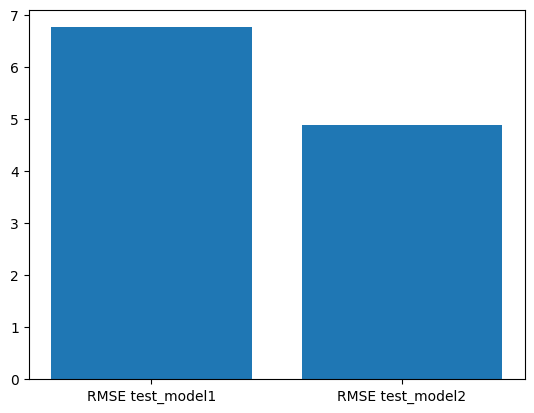

In [ ]:
error_dictionary=[{"model":"RMSE test_model1","value":rmse_test},
                  {"model":"RMSE test_model2","value": rmse_new_test}]
error_dataFrame=pd.DataFrame(error_dictionary)
plt.bar(error_dataFrame["model"],error_dataFrame["value"])

<BarContainer object of 2 artists>

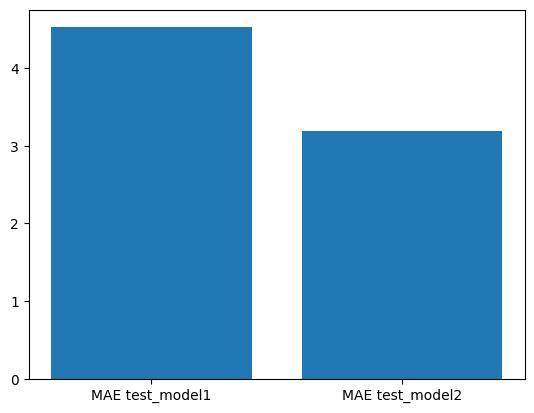

In [ ]:
error_dictionary=[{"model":"MAE test_model1","value":mae_test},
                  {"model":"MAE test_model2","value": mae_new_test}]
error_dataFrame=pd.DataFrame(error_dictionary)
plt.bar(error_dataFrame["model"],error_dataFrame["value"])

Model 2 is a better fit compared to model 1 since the r_squared value of model 2 is 0.7 which is closer to 1 than the 0.5 r-squared value of model 1

### Linear Regression with Ridge Regression

Now consider all the features (after removing linearly dependent variables) to fit a Ridge regression model on the training set with a package at your choice.

Present the model summary with the selected lambda. We call this model **Model 3**.

In [ ]:
RMSE_list=[]
MAE_list=[]
from sklearn.linear_model import Ridge
for x in np.arange(0.1,1.1,0.01):
  model3=Ridge(alpha=x)
  model3.fit(X_new_train,y_new_train)
  y_pred= model3.predict(X_new_test)
  RMSE_list.append(np.sqrt(mean_squared_error(y_new_test, y_pred)))
  MAE_list.append(mean_absolute_error(y_new_test, y_pred))





In [ ]:
#model summary with selected lambda

from sklearn.linear_model import Ridge
model3=Ridge(alpha=1)
model3.fit(X_new_train,y_new_train)
print('R^2 Value: ', model3.score(X_new_train, y_new_train))
print('Coefficients: ',list(model3.coef_))
print('Intercept:', model3.intercept_)

R^2 Value:  0.7390845883934127
Coefficients:  [-0.08979735898055091, 0.024378390498103787, -0.03055232973528471, 2.870780601723355, -7.883283716206609, 4.622293962405601, -0.017561488440302135, -1.2822457232158044, -1.1703835827746943e-05, -0.7474653654698573, 0.012717208711037209, -0.5248941240278419]
Intercept: 19.931121079544177


### Model 3 Performance Evaluation

Evaluate the prediction performance of Model 3 on the validation set with RMSE and MAE as performance metrics.

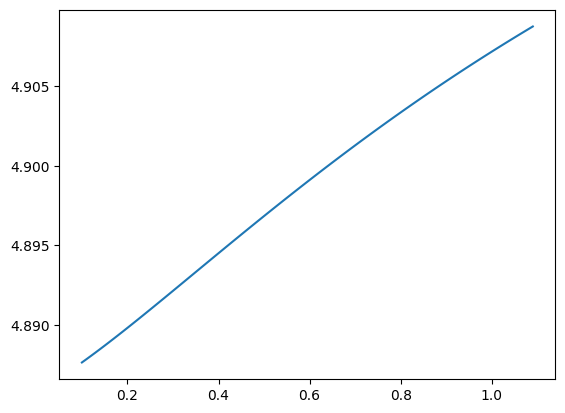

In [ ]:
x=np.array(np.arange(0.1,1.1,0.01))
plt.plot(x,RMSE_list)

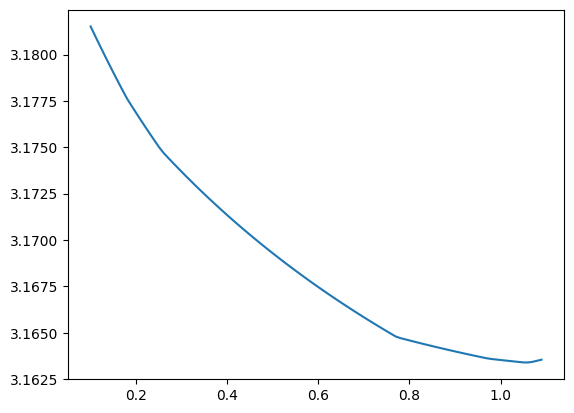

In [ ]:
x=np.array(np.arange(0.1,1.1,0.01))
plt.plot(x,MAE_list)

The best value as per MAE , for lambda is coming out to be 1
hence considering it as model3

In [ ]:
from sklearn.linear_model import Ridge
model3=Ridge(alpha=1)
model3.fit(X_new_train,y_new_train)
print('R^2 Value: ', model3.score(X_new_train, y_new_train))
print('Coefficients: ',list(model3.coef_))
print('Intercept:', model3.intercept_)

R^2 Value:  0.7390845883934127
Coefficients:  [-0.08979735898055091, 0.024378390498103787, -0.03055232973528471, 2.870780601723355, -7.883283716206609, 4.622293962405601, -0.017561488440302135, -1.2822457232158044, -1.1703835827746943e-05, -0.7474653654698573, 0.012717208711037209, -0.5248941240278419]
Intercept: 19.931121079544177


In [ ]:
np.sqrt(mean_squared_error(y_new_test, y_pred))

4.908770275138655

In [ ]:
mean_absolute_error(y_new_test, y_pred)

3.1635479819831187

## Model Selection

### Model Comparison & Selection

Among Model 1, 2, and 3, which one would be your pick for future implementation? State your reasons.

<BarContainer object of 3 artists>

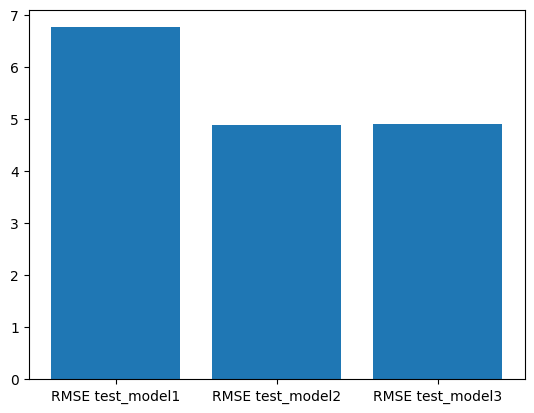

In [ ]:
error_dictionary=[{"model":"RMSE test_model1","value":rmse_test},
                  {"model":"RMSE test_model2","value": rmse_new_test},
                  {"model":"RMSE test_model3","value": np.sqrt(mean_squared_error(y_new_test, y_pred))}]
error_dataFrame=pd.DataFrame(error_dictionary)
plt.bar(error_dataFrame["model"],error_dataFrame["value"])

<BarContainer object of 3 artists>

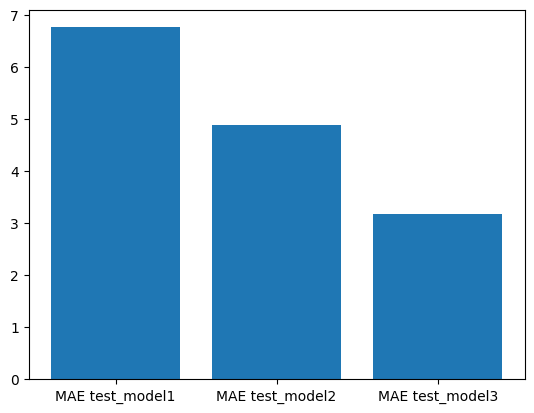

In [ ]:
error_dictionary=[{"model":"MAE test_model1","value":rmse_test},
                  {"model":"MAE test_model2","value": rmse_new_test},
                  {"model":"MAE test_model3","value": mean_absolute_error(y_new_test, y_pred)}]
error_dataFrame=pd.DataFrame(error_dictionary)
plt.bar(error_dataFrame["model"],error_dataFrame["value"])

After evaluating all the three models considering RMSE model2 and model3 are giving equal but better performance than model1

Also considering MAE model3 gives the best performance among all the three models, ultimately it comes down to which error metric you would give more weight to.